# Pandas

## Część I

Będziemy przetwarzać dane z Kaggle odnośnie imion dzieci w USA.

Krok 0: wczytaj pandas

In [1]:
import pandas as pd

Krok 1: wczytaj dane z pliku `US_Baby_Names_right.csv` z katalogu `lab12_files`

In [2]:
baby_names = pd.read_csv("./lab12_files/US_Baby_Names_right.csv")

Krok 2: przypisz dane do zmiennej `baby_names`. Zobacz jakiego typu dane są przechowywane i ile jest rekordów

In [3]:
baby_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016395 entries, 0 to 1016394
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1016395 non-null  int64 
 1   Id          1016395 non-null  int64 
 2   Name        1016395 non-null  object
 3   Year        1016395 non-null  int64 
 4   Gender      1016395 non-null  object
 5   State       1016395 non-null  object
 6   Count       1016395 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 54.3+ MB


Krok 3: podejrzy pierwszych 10 rekordów ze zbioru

In [4]:
baby_names.head(10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


Krok 4: usuń kolumny 'Unnamed: 0' oraz 'Id' 

In [5]:
baby_names_copy0 = baby_names

In [6]:
baby_names.drop(columns=['Unnamed: 0', 'Id'], inplace=True)
baby_names

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41
...,...,...,...,...,...
1016390,Seth,2014,M,WY,5
1016391,Spencer,2014,M,WY,5
1016392,Tyce,2014,M,WY,5
1016393,Victor,2014,M,WY,5


Krok 5: czy w zbiorze jest więcej imion kobiet, czy mężczyzn?

In [7]:
baby_names['Gender'].value_counts()

Gender
F    558846
M    457549
Name: count, dtype: int64

Krok 6: zgrupuj wiersze względem imion i wypisz 10 najczęściej pojawiających się imion.

In [8]:
name_df = baby_names.groupby('Name')['Count'].sum().sort_values(ascending=False)#.reset_index(name='Count')

name_df.head(10)

Name
Jacob       242874
Emma        214852
Michael     214405
Ethan       209277
Isabella    204798
William     197894
Joshua      191551
Sophia      191446
Daniel      191440
Emily       190318
Name: Count, dtype: int64

Krok 7: wyniki z Kroku 6 zaprezentuj na wykresie korzystając z `matplotlib`. Przygotuj trzy wykresy, tj. 10 najczęsciej występujących imion: ogółem, u mężczyzn i u kobiet.

In [9]:
top10_name_df = name_df.head(10).reset_index(name='Count')
top10_M_name_df = baby_names.where(lambda x: x['Gender']=='M').groupby('Name')['Count'].sum().sort_values(ascending=False).head(10).reset_index(name='Count')
top10_F_name_df = baby_names.where(lambda x: x['Gender']=='F').groupby('Name')['Count'].sum().sort_values(ascending=False).head(10).reset_index(name='Count')

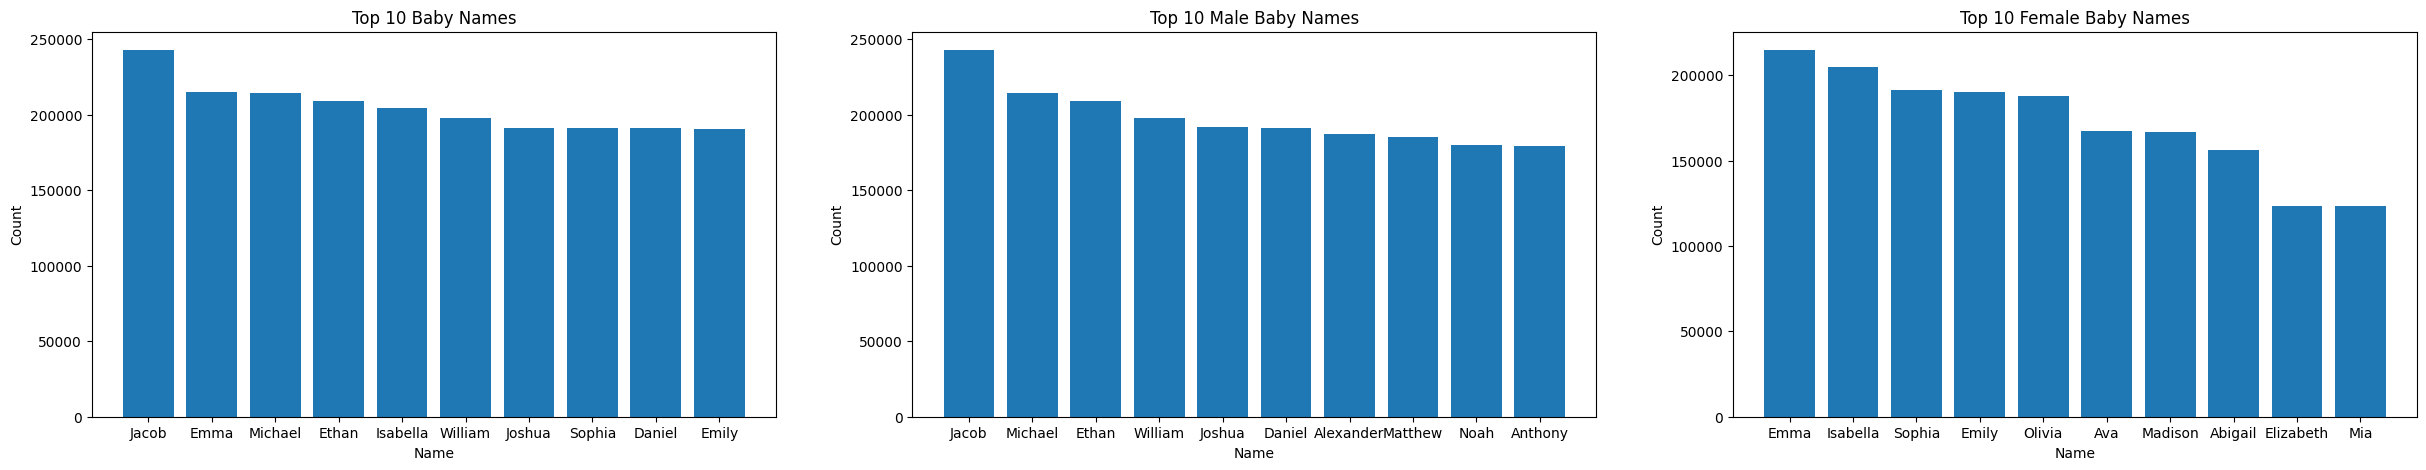

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,3,figsize=(30, 5))  

axs[0].bar(top10_name_df['Name'], top10_name_df['Count'])
axs[0].set_xlabel('Name')
axs[0].set_ylabel('Count')
axs[0].set_title('Top 10 Baby Names')

axs[1].bar(top10_M_name_df['Name'], top10_M_name_df['Count'])
axs[1].set_xlabel('Name')
axs[1].set_ylabel('Count')
axs[1].set_title('Top 10 Male Baby Names')

axs[2].bar(top10_F_name_df['Name'], top10_F_name_df['Count'])
axs[2].set_xlabel('Name')
axs[2].set_ylabel('Count')
axs[2].set_title('Top 10 Female Baby Names')


plt.show()



Krok 8: Jak wiele różnych imion występuje w zbiorze?

In [11]:
baby_names['Name'].nunique()

17632

In [12]:
len(name_df)

17632

Krok 9: Przygotuj generator imion, losujący je zgodnie z rozkłądem prawdopodobieństwa otrzymanym na podstawie przetwarzanego pliku

In [13]:
import random 

def random_name_generator():
    return random.choices(name_df.index, weights=name_df.values, k=1)[0]

for i in range(10):
    print(random_name_generator())

help(random.choices)

Vivian
Kaylyn
Jack
Gustavo
Yidel
Angely
Stevie
Cole
Alyssia
Yazmin
Help on method choices in module random:

choices(population, weights=None, *, cum_weights=None, k=1) method of random.Random instance
    Return a k sized list of population elements chosen with replacement.
    
    If the relative weights or cumulative weights are not specified,
    the selections are made with equal probability.



Krok 10: 
- Jakie imie występuje najczęściej?
- Wyznacz średnią, medianę i odchylenie stanadrdowe wystepowania imion.

In [14]:
name_df.idxmax()

'Jacob'

In [15]:
name_df.describe()

count     17632.000000
mean       2008.932169
std       11006.069468
min           5.000000
25%          11.000000
50%          49.000000
75%         337.000000
max      242874.000000
Name: Count, dtype: float64

In [16]:
name_df.iloc[8_816] # 17632/2 tablica posortowana wiec msui wyjsc tyle samo

49

## Część II

Krok 1: Wczytaj dane

Krok 2: Podejrzyj pierwsze 25 rekordów

Krok 3: Podejrzyj ostatnie 10 rekordów

Krok 4: Ile jest obserwacji w zbiorze? Ile jest kolumn w zbiorze?

Krok 5: Wypisz nazwy kolumn

Krok 6: Ile różnych zawodów jest w zbiorze?

Krok 7: Przygotuj efektywny wykres na którym przedstawisz procetowy udział poszczególnych zawodów w zbiorze na charplocie
Wykorzystaj https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

Przygotuj dwa wykresy: 
- jeden z wszystkimi zawodami
- drugi z 10 najcześtrzymi zawodami, pozostałem zawody trafiają do kategorii `Inne`

Krok 8: Przygotuj efektywny wykres na którym przedstawisz 10 najczęstrzych zawodów oraz ile pracuje w nich kobiet a ilu meżczyzn
Wykorzystaj https://matplotlib.org/gallery/api/barchart.html#sphx-glr-gallery-api-barchart-py

Krok 9: Przygotuj efektywny wykres na którym przedstawisz średni wiek pracowników danego zawodu

Krok 10: Przygotuj efektywny wykres na którym przedstawisz średni wiek kobiet i mężczyzn wykonujących dany zawód.